 #  A Whale off the Port(folio)
 ---

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
# define all paths for my input data sets
aapl_path = Path('Resources/aapl_historical.csv')
algo_path = Path('Resources/algo_returns.csv')
cost_historical_path = Path('Resources/cost_historical.csv')
goog_historical_path = Path('Resources/goog_historical.csv')
sp500_path = Path('Resources/sp500_history.csv')
whale_returns_path = Path('Resources/whale_returns.csv')

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_retuns = pd.read_csv(algo_path, index_col='Date', parse_dates=True)
algo_retuns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_retuns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_retuns.dropna(inplace=True)
algo_retuns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv(sp500_path, index_col='Date', parse_dates=True)
sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [11]:
# Fix Data Types
sp500['Close'] = sp500['Close'].str.replace('$','')
sp500['Close'] = sp500['Close'].astype('float')
sp500.head()

<ipython-input-11-0b1257e2817c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500['Close'] = sp500['Close'].str.replace('$','')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [12]:
# Calculate Daily Returns
sp500['Close'] = sp500['Close'].pct_change()
sp500.dropna(inplace=True)
sp500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Drop nulls
sp500.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500.columns = ["SP500"]
sp500.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_returns,algo_retuns,sp500], axis="columns", join="inner")
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

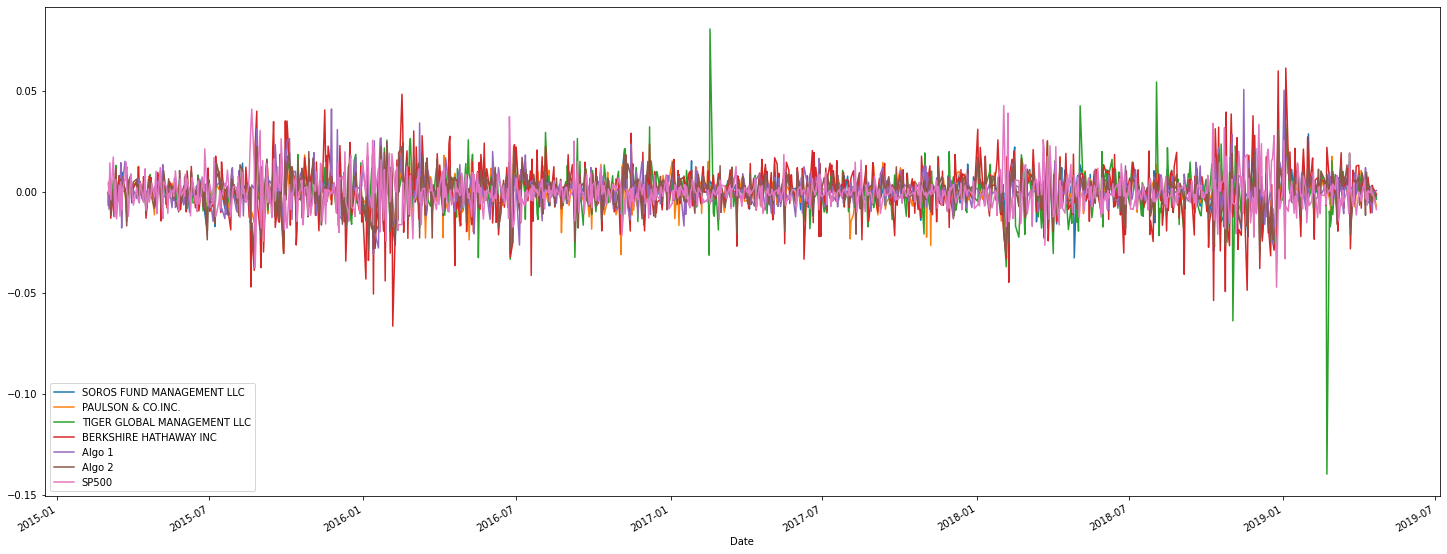

In [16]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

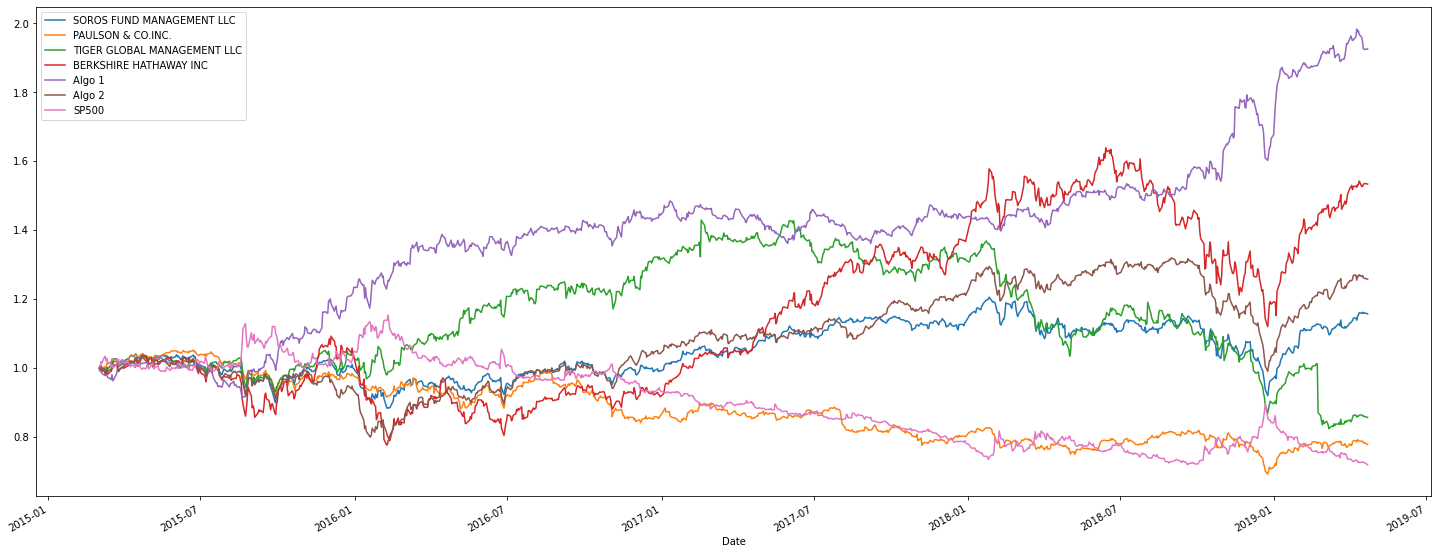

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

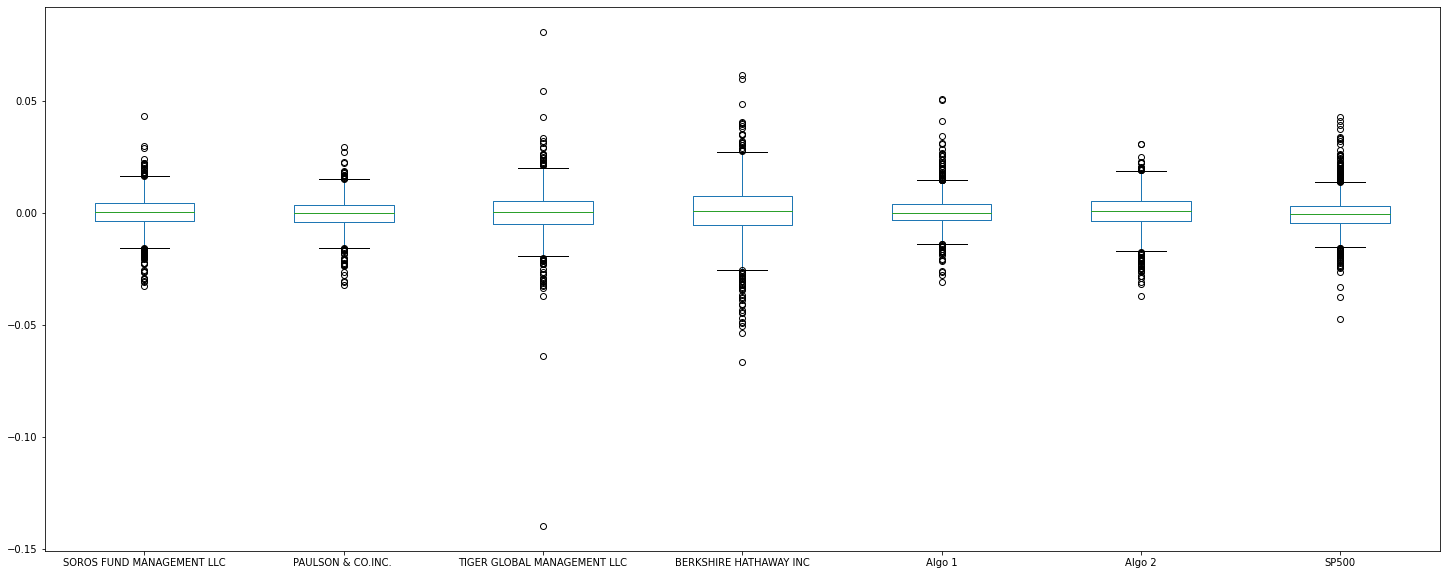

In [18]:
# Box plot to visually show risk
daily_returns.plot.box(figsize=(25,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
    # the daily std of S&P 500 is already computed in the daily_std dataframe
daily_std['SP500']
# Determine which portfolios are riskier than the S&P 500
    # Checking out what portfolios have a greater STD than the STD if SP500
high_risk_portfolios=daily_std[daily_std>daily_std['SP500']]
#alternative, but less code efficient
    #high_risk_portfolios = daily_std.where(daily_std>daily_std['SP500'])
    #high_risk_portfolios.dropna(inplace=True)
high_risk_portfolios

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

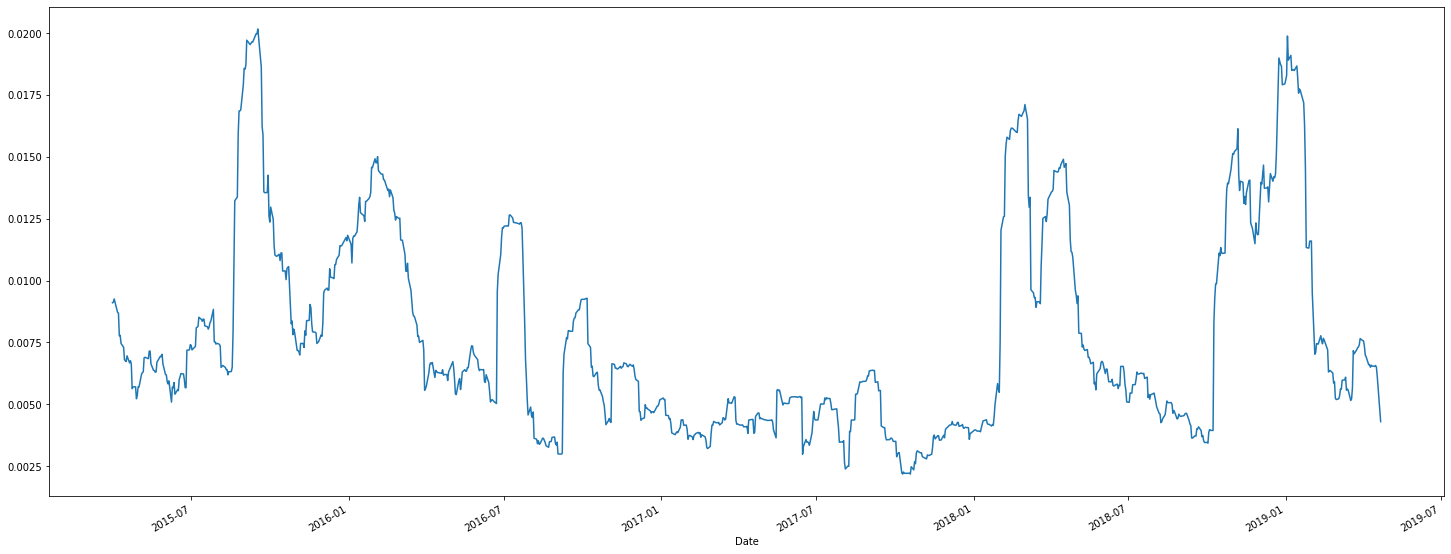

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_returns['SP500'].rolling(window=21).std().plot(figsize=(25,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

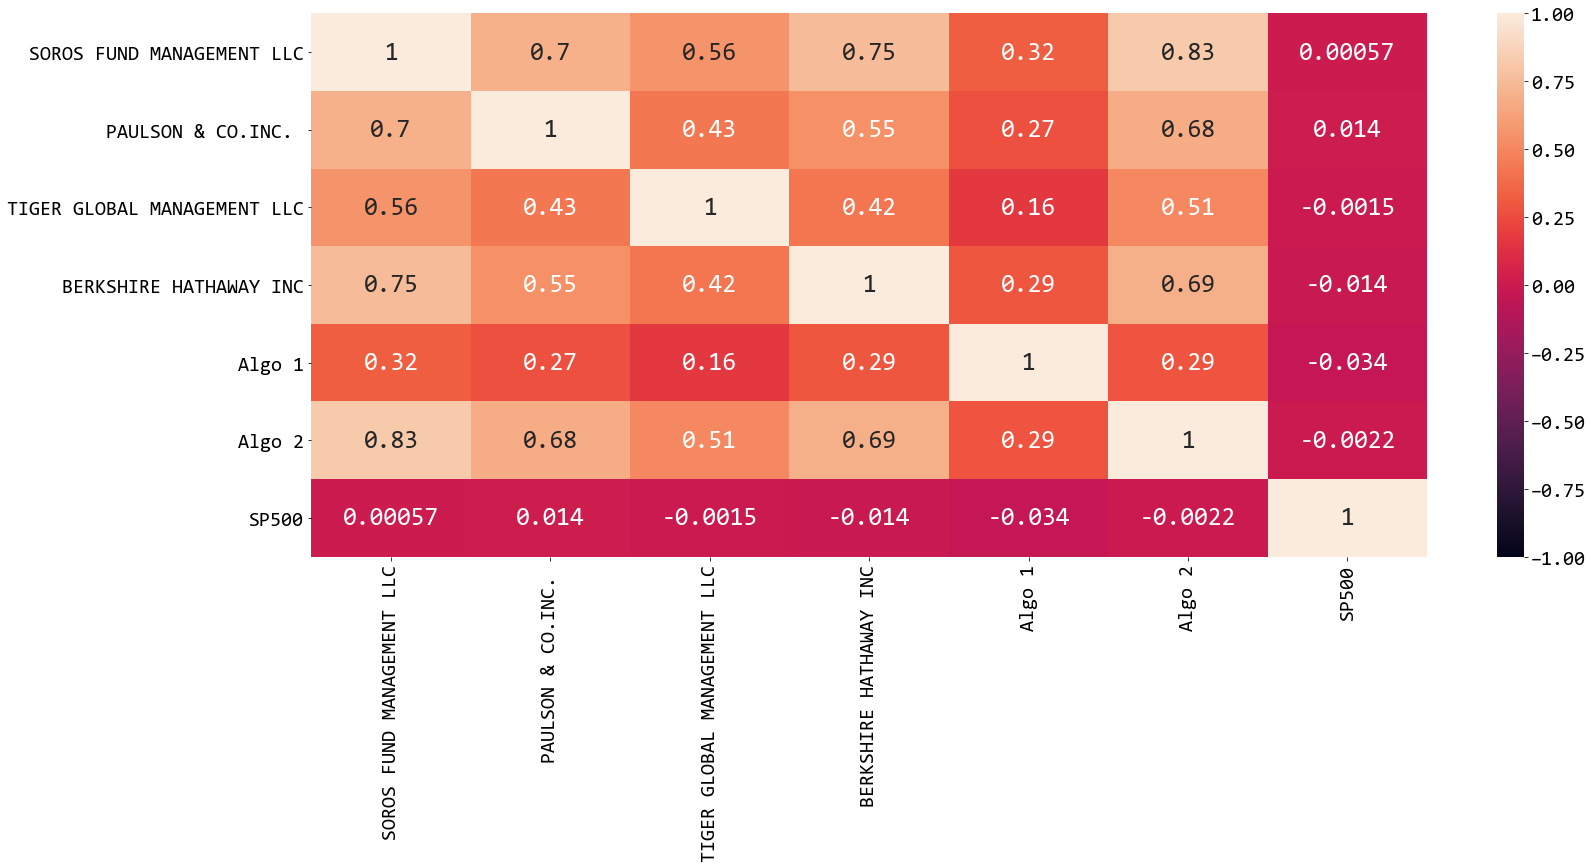

In [23]:
# Calculate the correlation
correlation = daily_returns.corr()
correlation
# Display de correlation matrix
plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.rcParams['font.family'] = "consolas"
plt.rcParams.update({'font.size': 20})

sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, annot_kws={'size':25})

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500 Returns'}, xlabel='Date'>

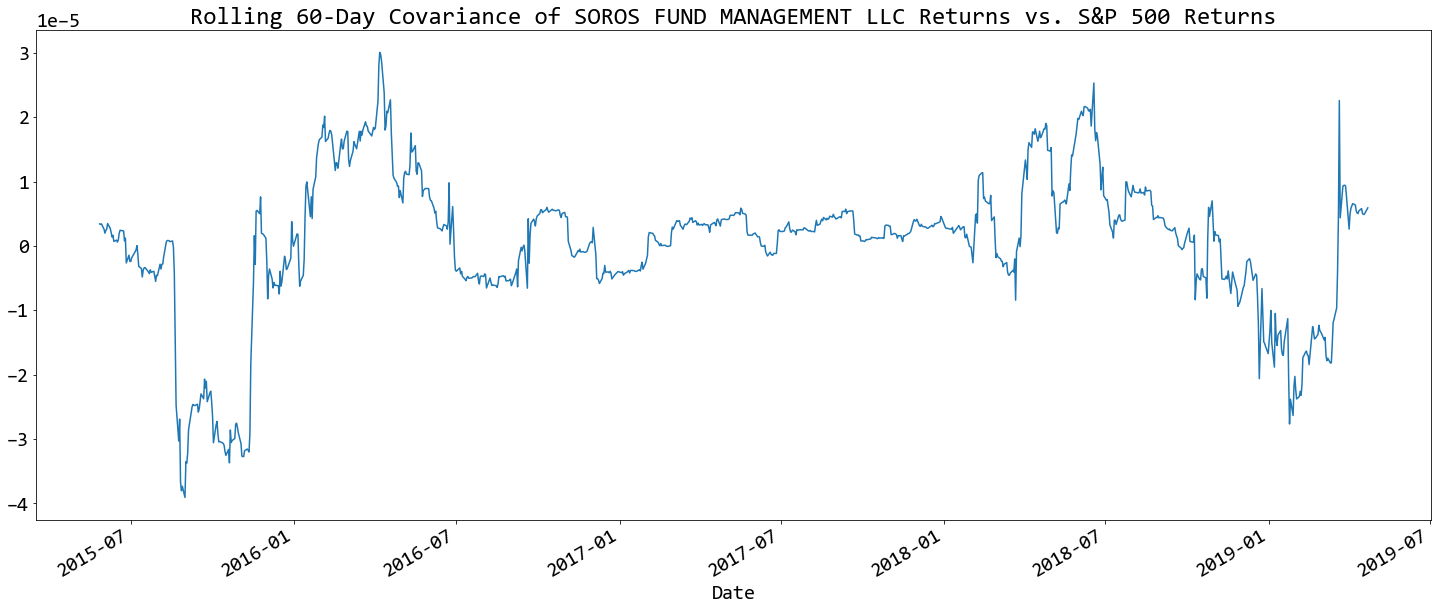

In [24]:
# Calculate covariance of a single portfolio
covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].cov(daily_returns['SP500'])
# Calculate variance of S&P 500
variance = daily_returns['SP500'].var()
# Computing beta
beta = covariance / variance
# Plot beta trend
rolling_covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['SP500'])
rolling_covariance.plot(figsize=(25, 10), title='Rolling 60-Day Covariance of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

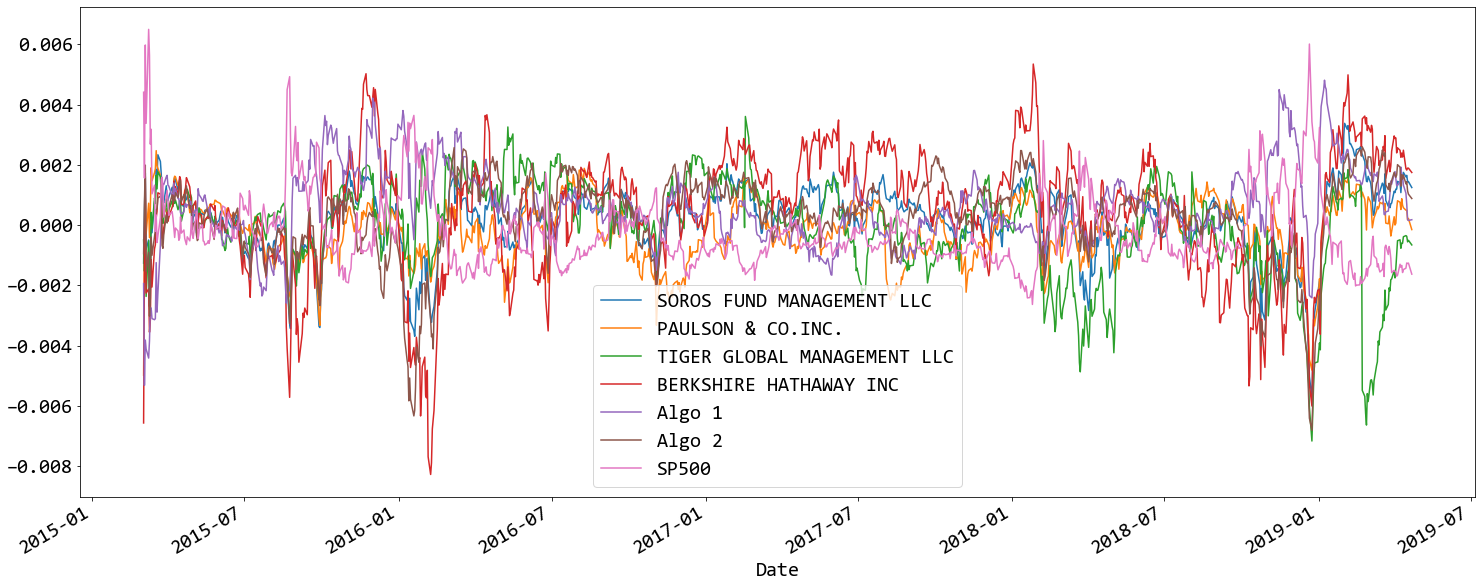

In [25]:
# Use `ewm` to calculate the rolling window
rolling_window_ewm = daily_returns.ewm(halflife="21 days", times=daily_returns.index).mean()
rolling_window_ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
annualized_sharpe_ratios.sort_values()

SP500                         -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

<AxesSubplot:>

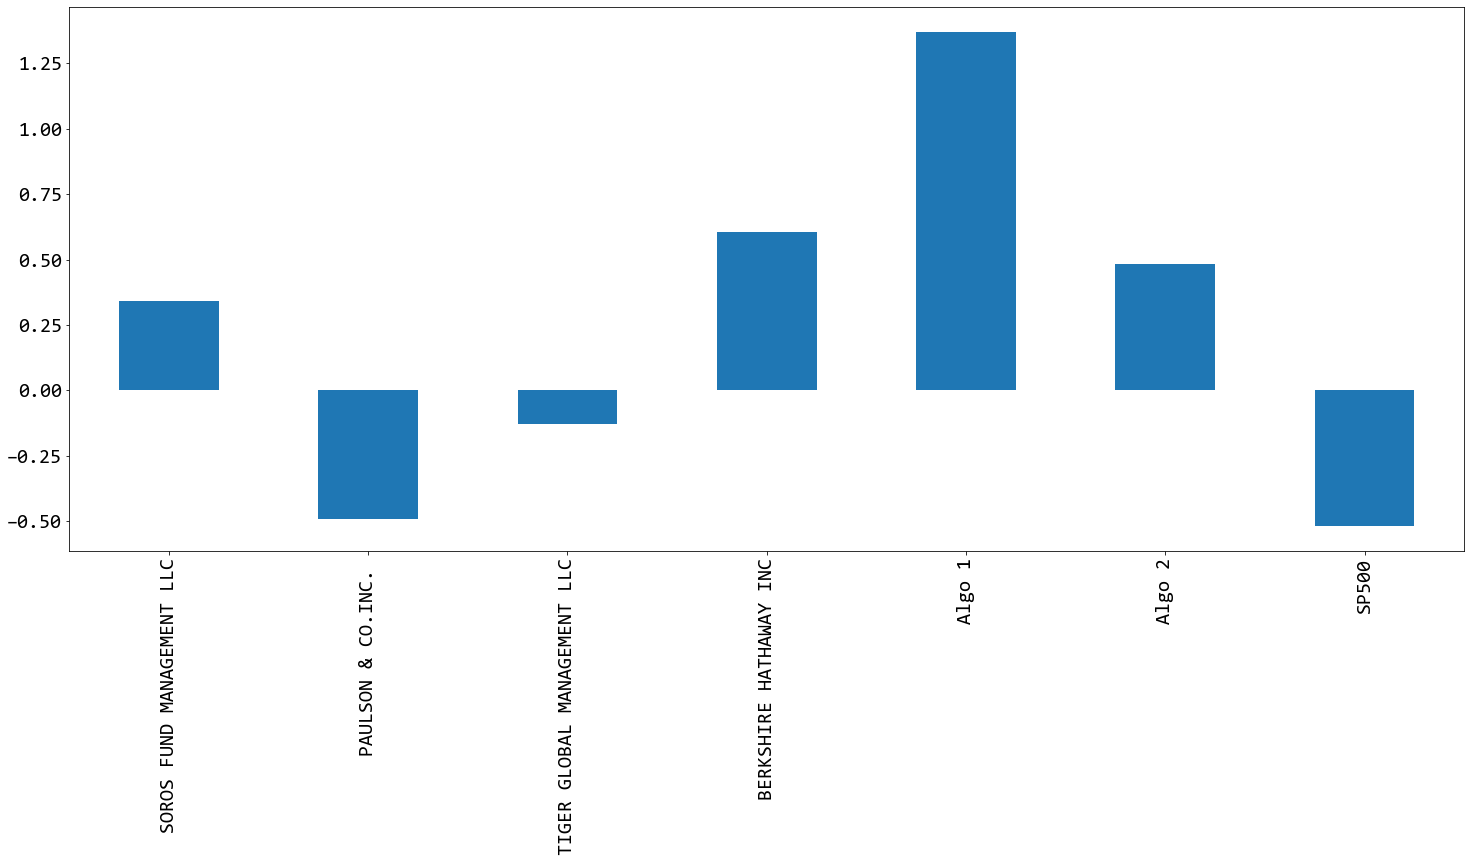

In [27]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed market and whales while algo 2 fell below market.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog = pd.read_csv(goog_historical_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).iloc[:, 1:]
goog.columns = ['goog']
goog.head()

,goog
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [29]:
# Reading data from 2nd stock
aapl = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).iloc[:, 1:]
aapl.columns = ['aapl']
aapl.head()

,aapl
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [30]:
# Reading data from 3rd stock
cost = pd.read_csv(cost_historical_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).iloc[:, 1:]
cost.columns = ['cost']
cost.head()

,cost
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [31]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([goog,aapl,cost], axis='columns', join='inner')
combined_stocks.head()

,goog,aapl,cost
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [32]:
# Reset Date index
combined_stocks.index.names = ["Date"]
combined_stocks.sort_index(inplace=True)

In [33]:
# Reorganize portfolio data by having a column per symbol
# already managed this few steps before

In [34]:
# Calculate daily returns
combined_stocks = combined_stocks.pct_change()
# Drop NAs
combined_stocks.dropna(inplace=True)
# Display sample data
combined_stocks.head()

,goog,aapl,cost
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = combined_stocks.dot(weights)
# Display sample data
weighted_returns.head()

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
weighted_returns = pd.concat([daily_returns,weighted_returns], axis="columns", join="inner")
weighted_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
weighted_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,my_portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
weighted_returns.dropna()
weighted_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,my_portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
annualized_std_weighted_returns = weighted_returns.std()* np.sqrt(252)
annualized_std_weighted_returns

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
SP500                          0.152469
my_portfolio                   0.211627
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

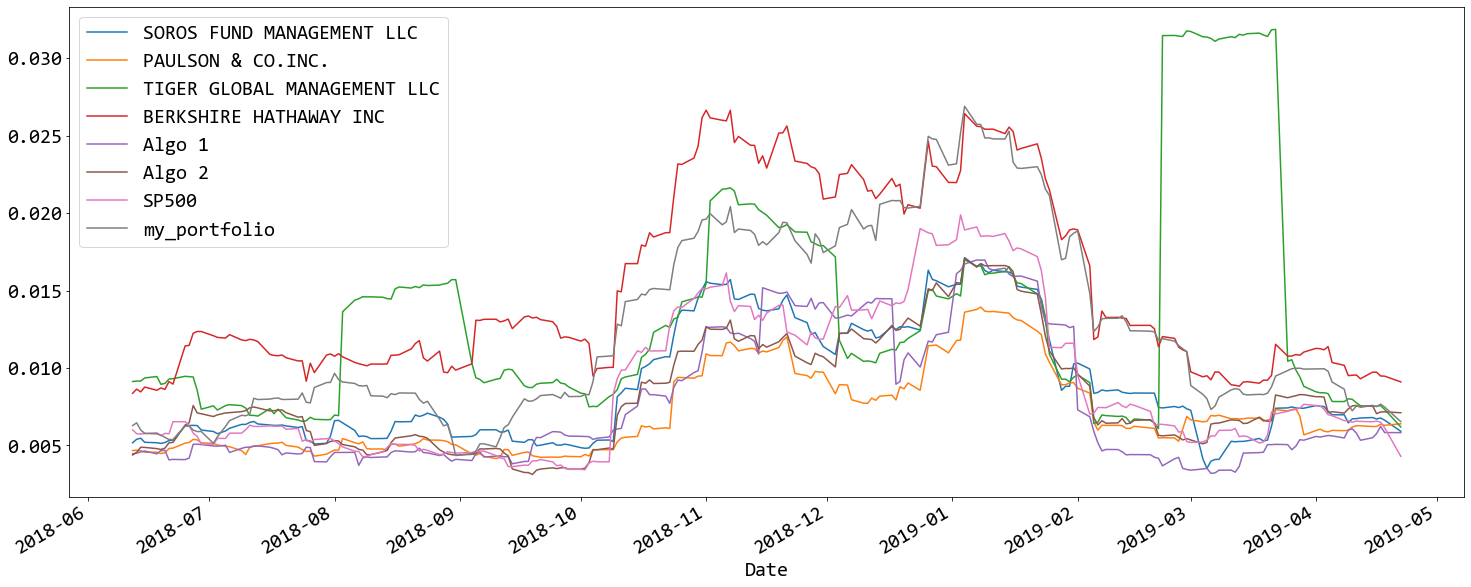

In [39]:
# Calculate rolling standard deviation
weighted_returns.rolling(window=21).std().plot(figsize=(25,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

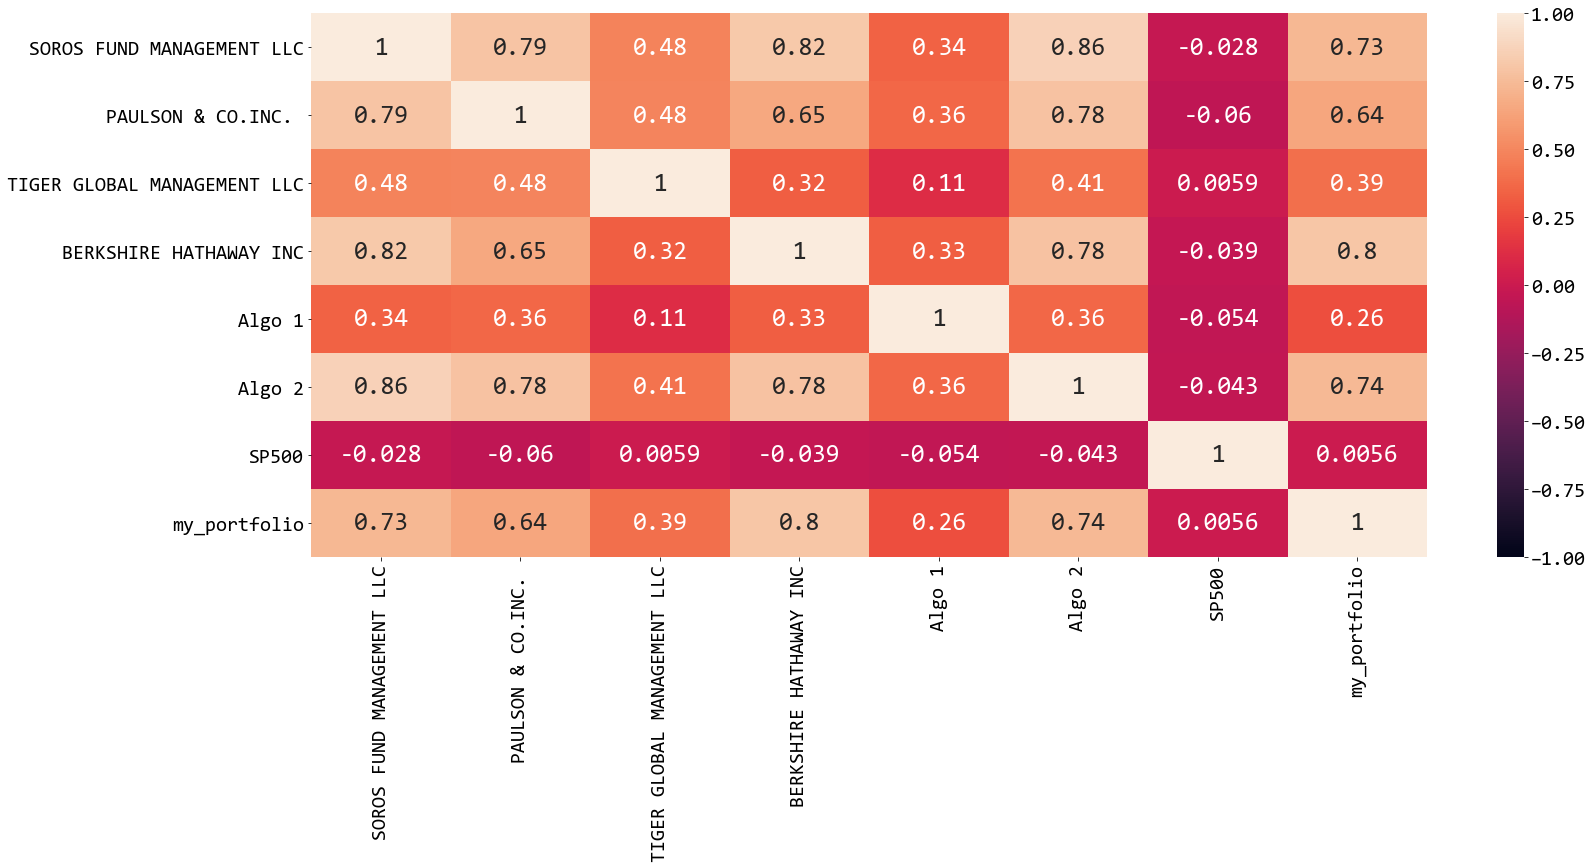

In [40]:
# Calculate and plot the correlation
correlation2 = weighted_returns.corr()
plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.rcParams['font.family'] = "consolas"
plt.rcParams.update({'font.size': 20})

sns.heatmap(correlation2, annot=True, vmin=-1, vmax=1, annot_kws={'size':25})

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio vs. S&P 500 Returns'}, xlabel='Date'>

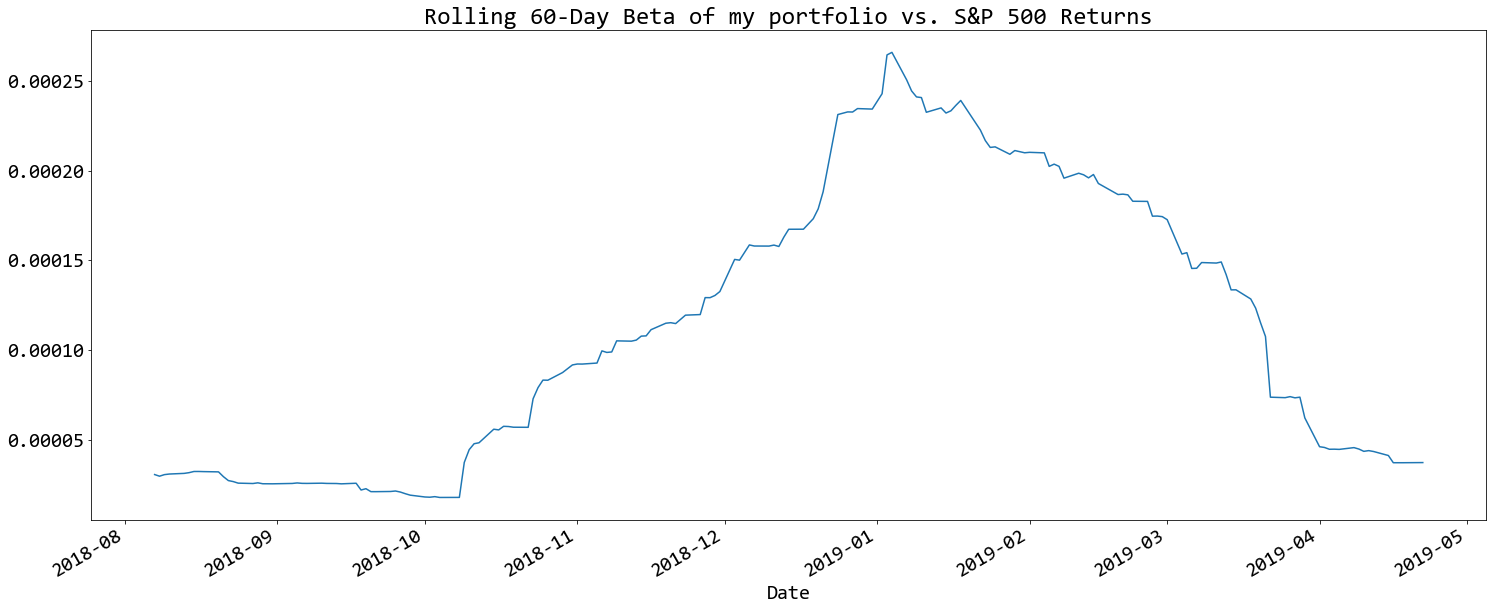

In [41]:
# Calculate and plot Beta
rolling_covariance = weighted_returns['my_portfolio'].rolling(window=60).cov(weighted_returns['SP500'])
rolling_variance = weighted_returns['SP500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance

rolling_variance.plot(figsize=(25, 10), title='Rolling 60-Day Beta of my portfolio vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
annualized_sharpe_ratios2 = (weighted_returns.mean() * 252) / (weighted_returns.std() * np.sqrt(252))
annualized_sharpe_ratios2.sort_values()
annualized_sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
SP500                         -0.427676
my_portfolio                   0.876152
dtype: float64

<AxesSubplot:>

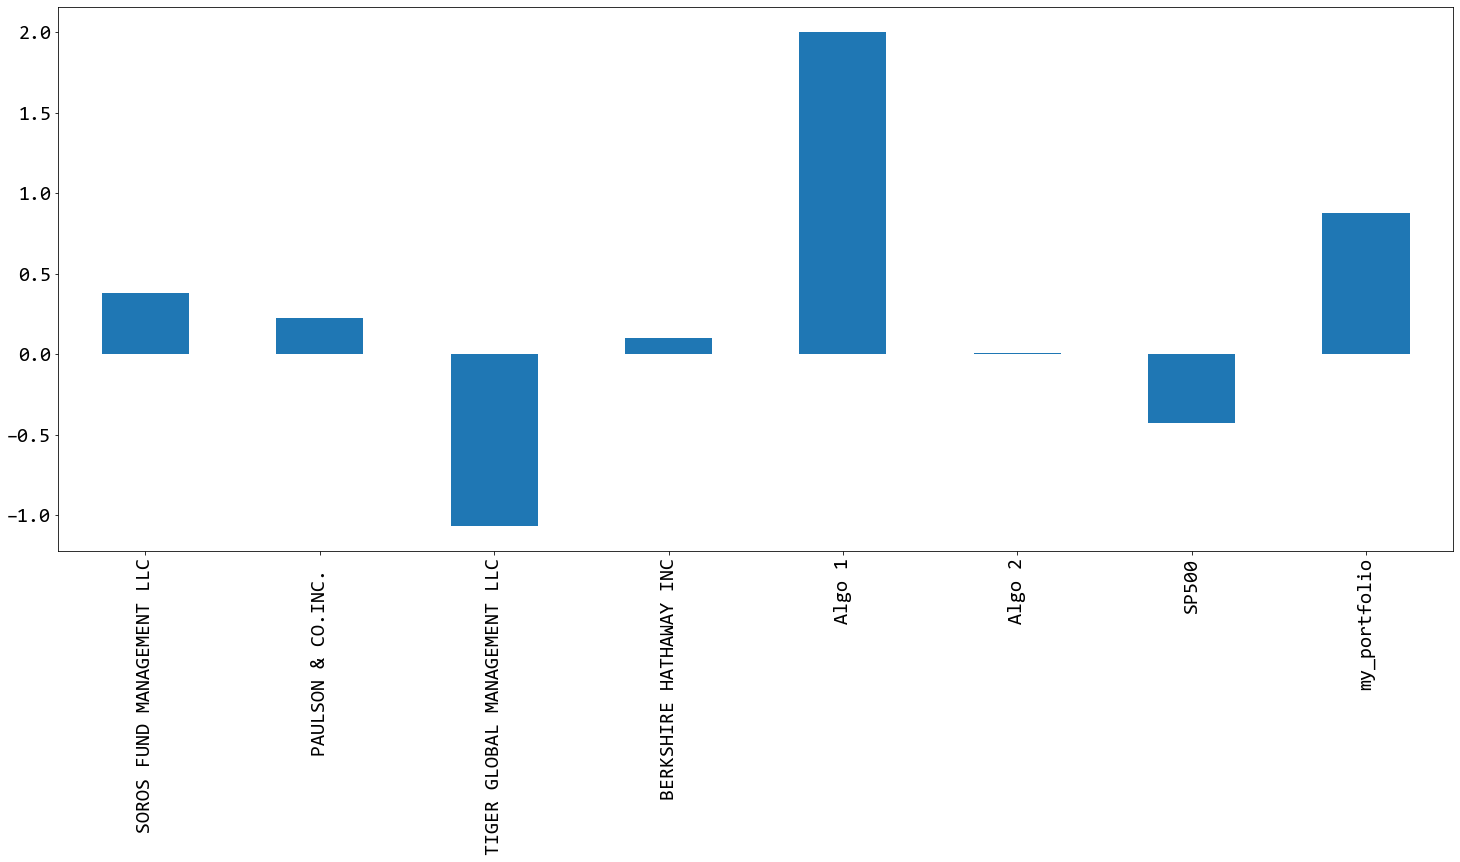

In [43]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios2.plot.bar()

### How does your portfolio do?

My portfolio is performing OK, only trailing Algo 1, but beating all other portfolios. My portfolio is riskier than others

In [44]:
annualized_std_weighted_returns.sort_values()
annualized_std_weighted_returns


SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
SP500                          0.152469
my_portfolio                   0.211627
dtype: float64